In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
plt.rcParams['font.size']=14

In [3]:
df=pd.read_excel('SinFriccion.xlsx')

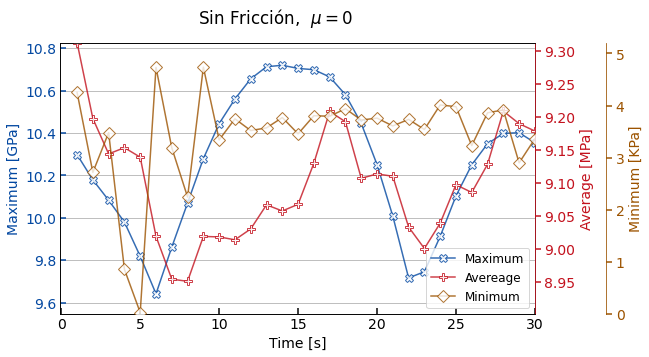

In [6]:
x=df['Time [s]']
y1=df['Maximum [MPa]']/1000
y2=df['Average [MPa]']
y3=df['Minimum [MPa]']*1000




#grab Ram's colors
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

#create custom function to turn axes invisible
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

#Create figure with subplots for main figure and for the extra axes
fig, host = plt.subplots(figsize=(8, 5))
fig.subplots_adjust(right=0.95)
#twinx() creates another axes sharing the x axis. We do this twice for 
#red and blue extra axes

color_Max=seshadri[1]
color_Average=seshadri[0]
color_Min=seshadri[5]





par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.15))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

#plot data paying attention to host vs par1 vs par2
p1, = host.plot(x, y1, color=color_Max, marker='X',mew=1, mfc='w', alpha=.8, markersize=8, label=r'Maximum')
# p4, = host.plot(x, y4, color=color_Max, marker='o', linestyle='None', mew=1, mfc='gray', alpha=.8, markersize=8, label=r'discharge 15L/min')
p2, = par1.plot(x, y2, color=color_Average, marker='P',mew=1, mfc='w', alpha=.8, markersize=8, label=r'Average')
# p5, = par1.plot(x2, y5, color=color_Average, marker='P', linestyle='None', mew=1, mfc='gray', alpha=.8, markersize=8, label=r'15,10L/min')
p3, = par2.plot(x, y3, color=color_Min, marker='D',mew=1, mfc='w', alpha=.8, markersize=8, label=r'Minimum')
# p6, = par2.plot(x2, y6, color=color_Min, marker='D', linestyle='None', mew=1, mfc='gray', alpha=.8, markersize=8, label=r'15,10L/min')
# p7, = host.plot(x2, y7, color=color_Max, marker='s', linestyle='None', mew=1, mfc='w', alpha=.8, markersize=8, label=r'charge 15,10L/min')
# p8, = host.plot(x2, y8, color=color_Max, marker='s', linestyle='None', mew=1, mfc='gray', alpha=.8, markersize=8, label=r'discharge 15,10L/min')

#set axes limits for host, par1, par2
xmin=-0.1
xmax=round(1.01*max(x))

Max_min=0.99*min(y1)
Max_max=1.01*max(y1)

Amin=-0.05+min(y2)
Amax=max(y2)

Min_min=0
Min_max=1.1*max(y3)



host.set_xlim(xmin,xmax)
host.set_ylim(Max_min,Max_max)
par1.set_ylim(Amin,Amax)
par2.set_ylim(Min_min,Min_max)

#set axes labels for host, par1, par2
host.set_xlabel('Time [s]')
host.set_ylabel(r'Maximum [GPa]')
par1.set_ylabel(r'Average [MPa]')
par2.set_ylabel(r'Minimum [KPa]')

#set axis label colors for host, par1, par2


host.yaxis.label.set_color(color_Max)
par1.yaxis.label.set_color(color_Average)
par2.yaxis.label.set_color(color_Min)

#define tick parameters for host, par1, par2
tkw = dict(size=6, width=1.5)
minorLocatory = MultipleLocator(100)
minorLocatorx = MultipleLocator(10)
host.yaxis.set_minor_locator(minorLocatory)
host.xaxis.set_minor_locator(minorLocatorx)

minorLocatory = MultipleLocator(10)
par1.yaxis.set_minor_locator(minorLocatory)

minorLocatory = MultipleLocator(100)
par2.yaxis.set_minor_locator(minorLocatory)

#set colors for host, par1, par2 axes
host.tick_params(axis='y', colors=color_Max, **tkw)
# host.ticklabel_format(style='sci', axis='y', scilimits=(3,3))
par1.tick_params(axis='y', colors=color_Average, **tkw)
par2.tick_params(axis='y', colors=color_Min, **tkw)
# par2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
host.tick_params(direction='in', **tkw)
par1.spines["right"].set_edgecolor(p2.get_color())
par2.spines["right"].set_edgecolor(p3.get_color())

lines = [p1, p2, p3]

host.legend(lines, ['Maximum','Avereage','Minimum'],fontsize=12,frameon=True,loc=4)
plt.suptitle(r'Sin Fricción,  $\mu = 0$')
# host.legend()
# plt.savefig('data_for_exercises/plotting/multiple_axes.eps', dpi=300, bbox_inches='tight')
plt.savefig('Resumen_SinFriccion.png', dpi=300,bbox_inches='tight')
host.grid(axis='y',which='both')

plt.show()